## 讀取iris 資料集

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 建立決策樹

In [42]:
from sklearn import tree
treemodel = tree.DecisionTreeClassifier(max_depth = 2)
clf = treemodel.fit(iris.data, iris.target)

In [43]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## 繪製決策樹

In [34]:
tree.export_graphviz(clf, out_file='tree.dot') 

In [15]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

## 視覺化呈現資料

Populating the interactive namespace from numpy and matplotlib


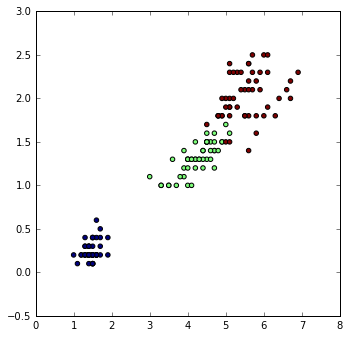

In [31]:
%pylab inline
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
plt.show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


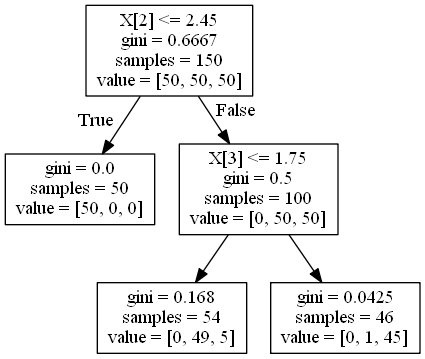

In [35]:
%pylab inline
from IPython.display import Image 
Image('tree2.png')


## 產生預測結果

In [44]:
predicted = clf.predict(iris.data)

In [45]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(predicted, iris.target)
cm


array([[50,  0,  0],
       [ 0, 49,  5],
       [ 0,  1, 45]])

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, iris.target)

0.95999999999999996

In [49]:
accu = 144 /150
accu

0.96

## 將資料分成訓練與測試資料集

In [50]:
iris.data.shape

(150, 4)

In [51]:
iris.target.shape

(150,)

In [55]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)
# iris.data  = X_train(67%) + X_test(33%)
# iris.target = y_train(67%) + y_test(*33%)

In [56]:
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [57]:
print(y_train.shape)
print(y_test.shape)

(100,)
(50,)


## 跟據訓練資料集建立模型, 套用到測試資料集

In [58]:
from sklearn import tree
treemodel = tree.DecisionTreeClassifier(max_depth = 2)
clf = treemodel.fit(X_train, y_train)

In [59]:
predicted = clf.predict(X_test)

## 驗證模型準確率

In [60]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(predicted, y_test)
cm

array([[19,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 15]])

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.97999999999999998

## 讀取使用者的PageView 資料

In [ ]:
import pandas
pageview = pandas.read_hdf('pageview0720_0730.h5')

In [ ]:
pageview[pageview.PageLocation == 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'].head()

In [ ]:
import pandas
pandas.set_option('display.max_colwidth', 1000)
pageview[pageview.SessionNumber == 20161424].sort_values('EventTimestamp')

## 統計線上開卡人數

In [ ]:
activate = 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'
pageview[pageview.PageLocation == activate].count()

In [ ]:
len(pageview[pageview.PageLocation == activate].SessionNumber.unique())

In [6]:
pageview.SessionNumber.count()

8887227

## 表列開過卡(Online_ActivateCardForm)的人(Session)

In [7]:
activate = 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'
activateuser = pageview[pageview.PageLocation == activate].SessionNumber

In [8]:
pageview[pageview.SessionNumber.isin(activateuser)].PageLocation.value_counts().sort_values(ascending=False).head()

https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp             4859
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/ActivateCardForm.aspx        4307
https://www.cathaybk.com.tw/cathaybk/card/index.asp                          3038
https://www.cathaybk.com.tw/cathaybk/card/card/card.asp                      2302
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/ActivateCardForm.aspx#TOP    1983
Name: PageLocation, dtype: int64

## 表列出瀏覽過 card/card/card.asp (信用卡產品介紹) 的人(Session)

In [9]:
cardview = 'https://www.cathaybk.com.tw/cathaybk/card/card/card.asp'
pageview[pageview.PageLocation == cardview].count()

EventTimestamp    69796
PageLocation      69796
SessionNumber     69796
TrackingUuid      69796
dtype: int64

In [10]:
cardview = 'https://www.cathaybk.com.tw/cathaybk/card/card/card.asp'
len(pageview[pageview.PageLocation == cardview].SessionNumber.unique())

45400

In [11]:
# cardViewUsers 代表不重覆的 Session
cardViewUsers = pageview[pageview.PageLocation == cardview].SessionNumber.unique()

In [12]:
cardViewUsers

array([20031976, 20161424, 20141562, ..., 23631707, 23651466, 23628176], dtype=int64)

## 看過 card/card/card.asp(信用卡產品介紹) 的人的頁面瀏覽行為

In [13]:
cardViewBehavior  = pageview[pageview.SessionNumber.isin(cardViewUsers)]

In [14]:
cardViewBehavior.head()

,EventTimestamp,PageLocation,SessionNumber,TrackingUuid
75,2016-07-20 23:57:52.280,https://www.cathaybk.com.tw/cathaybk/card/event/2011/travel_1.asp,20161424,fe01c11e-89c0-4e67-aa02-50c203894881
78,2016-07-20 16:18:14.586,https://www.cathaybk.com.tw/cathaybk/,20031976,e91778f6-dd1a-469a-ae6e-8778e71c3460
219,2016-07-20 23:56:11.286,https://www.cathaybk.com.tw/cathaybk/card/event/2012/201203newcard_ggg/index.asp,20161424,fe01c11e-89c0-4e67-aa02-50c203894881
222,2016-07-20 16:18:29.279,https://www.cathaybk.com.tw/cathaybk/card/card/allcard.asp,20031976,e91778f6-dd1a-469a-ae6e-8778e71c3460
363,2016-07-20 23:55:03.662,https://www.mybank.com.tw/mybank,20161424,fe01c11e-89c0-4e67-aa02-50c203894881


## 資料預處理

In [15]:
a = 'cathay.bk.com/query?q=123'
a[:a.find('?')]

'cathay.bk.com/query'

In [16]:
#移除掉 ? 後面資料
cardViewBehavior.PageLocation = cardViewBehavior.PageLocation.map(lambda link: link[:link.find('?')].strip().replace('https://www.cathayholdings.com/bank/', 'https://www.cathaybk.com.tw/') if link.find('?') > 0 else link.strip().replace('https://www.cathayholdings.com/bank/', 'https://www.cathaybk.com.tw/'))

#移除掉 # 後面資料
cardViewBehavior.PageLocation = cardViewBehavior.PageLocation.map(lambda link: link[:link.find('#')].strip() if link.find('#') > 0 else link.strip())

#將aspx 變為asp
cardViewBehavior.PageLocation = cardViewBehavior.PageLocation.map(lambda link: link.replace('.aspx', '.asp'))


C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## 統計每個Session 看過的PageLocation 次數

In [17]:
# select SessionNumber, PageLocation, count(*)
# from cardviewbehavior gorup by SessionNumber, PageLocation
cardViewBehavior.groupby(['SessionNumber', 'PageLocation'])['EventTimestamp'].count().head()

SessionNumber  PageLocation                                                                        
19728893       https://www.cathaybk.com.tw/Cathaybk/card/index.asp                                     1
               https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Cfm.asp     7
               https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp1.asp    3
               https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp2.asp    3
               https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp4.asp    1
Name: EventTimestamp, dtype: int64

## 將資料轉變為Pivot Table

In [18]:
cardViewBehaviorGrp = cardViewBehavior.groupby(['SessionNumber', 'PageLocation'])['EventTimestamp'].count()

In [19]:
cardViewBehaviorGrp  = cardViewBehaviorGrp.reset_index()
cardViewBehaviorGrp.columns = ['SessionNumber', 'PageLocation', 'count']

In [20]:
cardViewBehaviorGrp.head(10)

,SessionNumber,PageLocation,count
0,19728893,https://www.cathaybk.com.tw/Cathaybk/card/index.asp,1
1,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Cfm.asp,7
2,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp1.asp,3
3,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp2.asp,3
4,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Inp4.asp,1
5,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/Apply_Rst.asp,1
6,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/applicationType.asp,3
7,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/index.asp,1
8,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/validate.asp,2
9,19728893,https://www.cathaybk.com.tw/cathaybk/OnlineLoan_card_apply.asp,1


In [21]:
len(cardViewBehaviorGrp.PageLocation.unique())
len(cardViewBehaviorGrp.SessionNumber.unique())

45400

In [22]:
cardViewBehaviorGrp_df  = cardViewBehaviorGrp.pivot(index = 'SessionNumber', columns= 'PageLocation', values='count')

In [23]:
cardViewBehaviorGrp_df.shape

(45400, 1089)

In [24]:
cardViewBehaviorGrp_df.head()

PageLocation,https://www.cathaybk.com.tw/Cathaybk/Card/mybill_net/CathayLife/Card/search.asp,https://www.cathaybk.com.tw/Cathaybk/GS/search.asp,https://www.cathaybk.com.tw/Cathaybk/OnlineLoan/creditcard/card_apply/index.asp,https://www.cathaybk.com.tw/Cathaybk/OnlineLoan_card_apply.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/allcard.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_1.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_11.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_28.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_3.asp,...,https://www.mybank.com.tw/NewOnlineLoan/intro.asp,https://www.mybank.com.tw/mybank,https://www.mybank.com.tw/mybank/,https://www.mybank.com.tw/mybank/Home/Login,https://www.mybank.com.tw/mybank/Home/MyMobiBank,https://www.mybank.com.tw/mybank/Home/MyMobiBankLogin_OTP,https://www.mybank.com.tw/mybank/Outer/L0101_EmailAuth,https://www.mybank.com.tw/mybank/Quicklinks/Outer/HowToApply,https://www.mybank.com.tw/mybank/Quicklinks/Outer/TxnOverViewRst,https://www.mybank.com.tw/mybank/home/MyMobiBank
SessionNumber,,,,,,,,,,,,,,,,,,,,,
19728893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19728895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19728937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19728989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19729241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 將nan 轉變為0

In [25]:
cardViewBehaviorGrp_df = cardViewBehaviorGrp_df.fillna(0)

In [26]:
cardViewBehaviorGrp_df.head()

PageLocation,https://www.cathaybk.com.tw/Cathaybk/Card/mybill_net/CathayLife/Card/search.asp,https://www.cathaybk.com.tw/Cathaybk/GS/search.asp,https://www.cathaybk.com.tw/Cathaybk/OnlineLoan/creditcard/card_apply/index.asp,https://www.cathaybk.com.tw/Cathaybk/OnlineLoan_card_apply.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/allcard.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_1.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_11.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_28.asp,https://www.cathaybk.com.tw/Cathaybk/card/card/card_3.asp,...,https://www.mybank.com.tw/NewOnlineLoan/intro.asp,https://www.mybank.com.tw/mybank,https://www.mybank.com.tw/mybank/,https://www.mybank.com.tw/mybank/Home/Login,https://www.mybank.com.tw/mybank/Home/MyMobiBank,https://www.mybank.com.tw/mybank/Home/MyMobiBankLogin_OTP,https://www.mybank.com.tw/mybank/Outer/L0101_EmailAuth,https://www.mybank.com.tw/mybank/Quicklinks/Outer/HowToApply,https://www.mybank.com.tw/mybank/Quicklinks/Outer/TxnOverViewRst,https://www.mybank.com.tw/mybank/home/MyMobiBank
SessionNumber,,,,,,,,,,,,,,,,,,,,,
19728893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19728895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19728937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19728989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19729241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cardViewBehaviorGrp_df.corr()

In [27]:
activate = 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'
cardViewBehaviorGrp_df[activate].head()

SessionNumber
19728893    0.0
19728895    1.0
19728937    0.0
19728989    0.0
19729241    0.0
Name: https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp, dtype: float64

In [28]:
cardViewBehaviorGrp_df[activate] =  cardViewBehaviorGrp_df[activate].map(lambda e: 1 if e>=1 else 0)

In [29]:
cardViewBehaviorGrp_df[activate].value_counts()

0    44241
1     1159
Name: https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp, dtype: int64

## 移除重覆頁面

In [ ]:
del cardViewBehaviorGrp_df['https://www.cathaybk.com.tw/cathaybk/OnlineLoan/ActivateCardForm.asp']

In [146]:
del cardViewBehaviorGrp_df['https://www.cathaybk.com.tw/cathaybk/OnlineLoan/ActivateCardFormEnd.asp']

In [152]:
del cardViewBehaviorGrp_df['https://www.cathaybk.com.tw/cathaybk/card/index.asp']

## 建立與繪製決策樹

In [161]:
from sklearn import tree
activate = 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'
clf = tree.DecisionTreeClassifier()

# data   => view count table without activate page
# target => view count of activate page

clf = clf.fit(cardViewBehaviorGrp_df.drop(activate, axis = 1), cardViewBehaviorGrp_df[activate])

In [162]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot') 

In [163]:
cardViewBehaviorGrp_df.drop(activate, axis = 1).columns[773]

'https://www.cathaybk.com.tw/cathaybk/index.asp'

In [164]:
https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/ActivateCardForm.aspx

SyntaxError: invalid syntax (<ipython-input-164-0930496169d9>, line 1)

## 產生預測結果

In [165]:
predicted = clf.predict(cardViewBehaviorGrp_df.drop(activate, axis = 1))
predicted


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(cardViewBehaviorGrp_df[activate], predicted) 
cm

array([[44240,     1],
       [  230,   929]])

In [167]:
from sklearn.metrics import accuracy_score
accuracy_score(cardViewBehaviorGrp_df[activate], predicted)


0.99491189427312776

## 自動排序最重要的特徵

In [168]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf = clf.fit(cardViewBehaviorGrp_df.drop(activate, axis = 1), cardViewBehaviorGrp_df[activate])
clf.feature_importances_  

array([  9.74614641e-05,   4.54820166e-06,   3.57358702e-06, ...,
         1.64594478e-03,   1.53655716e-03,   4.14274488e-04])

In [173]:
a = np.array([3,1,2,5,4])
a.sort()
print(a)

[1 2 3 4 5]


In [171]:
import numpy as np
a = np.array([3,1,2,5,4])
a.argsort()

array([1, 2, 0, 4, 3], dtype=int64)

## 有意義的Feature

In [178]:
for rank in clf.feature_importances_.argsort()[:-30:-1]:
    print(cardViewBehaviorGrp_df.drop(activate, axis = 1).columns[rank], rank, clf.feature_importances_[rank]) 

https://www.cathaybk.com.tw/cathaybk/card/card/card.asp 230 0.0454029644113
https://www.cathaybk.com.tw/Cathaybk/card/index.asp 32 0.0346477367397
https://www.cathaybk.com.tw/cathaybk/ 76 0.0330875786381
https://www.cathaybk.com.tw/cathaybk/card/card/help.asp 262 0.0309550491023
https://www.cathaybk.com.tw/cathaybk/card/card/right/right_1.asp 279 0.0284825505572
https://www.cathaybk.com.tw/cathaybk/card/card/notice/notice_1.asp 265 0.022255363845
https://www.cathaybk.com.tw/cathaybk/card/event/2011/travel_1.asp 317 0.0211829309976
https://www.cathaybk.com.tw/cathaybk/card/event/2012/201203newcard_ggg/index.asp 321 0.0210854789658
https://www.cathaybk.com.tw/cathaybk/card/login_news_list.asp 596 0.0203546294393
https://www.cathaybk.com.tw/cathaybk/index.asp 773 0.0195077800287
https://www.cathaybk.com.tw/cathaybk/OnlineLoan_card_apply.asp 165 0.0176234076387
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/card_apply/index.asp 115 0.0167133607673
https://www.mybank.com.tw/myba

## 沒有意義的Feature

In [179]:
for rank in clf.feature_importances_.argsort()[0:30]:
    print(cardViewBehaviorGrp_df.drop(activate, axis = 1).columns[rank], rank, clf.feature_importances_[rank]) 

https://www.cathaybk.com.tw/cathaybk/card/event/2016/treemall_flashsale/20160419/card_news1050419_login01.asp 542 0.0
https://www.mybank.com.tw/MyBank/Home/WRedirectDetail 1011 0.0
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/cashadvance_apply/Authenticate_OTP.asp 119 0.0
https://www.cathaybk.com.tw/cathaybk/phone-call_01.asp 880 0.0
https://www.cathaybk.com.tw/cathaybk/corp/myb2b/authorize.asp 685 0.0
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/cashadvance_apply/finish.asp 122 0.0
https://www.cathaybk.com.tw/cathaybk/trust/trust_2_1_4.asp 891 0.0
https://www.mybank.com.tw/MyBank/Home/MyMobiBank 1009 0.0
https://www.cathaybk.com.tw/cathaybk/trust/trust_2_1_5.asp 892 0.0
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/confirm/Search_step1_account.asp 126 0.0
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/confirm/Search_step1_card.asp 127 0.0
https://www.cathaybk.com.tw/cathaybk/OnlineLoan/creditcard/confirm/confirm_step2_card.asp 128 0

## 分為訓練資料集與測試資料集

In [197]:
from sklearn import tree
activate = 'https://www.cathaybk.com.tw/cathaybk/Online_ActivateCardForm.asp'
model = tree.DecisionTreeClassifier()
# data   => view count table without activate page
# target => view count of activate page

In [195]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cardViewBehaviorGrp_df.drop(activate, axis = 1), cardViewBehaviorGrp_df[activate], test_size=0.33, random_state=42)
# cardViewBehaviorGrp_df  = X_train(67%) + X_test(33%)
# activate                = y_train(67%) + y_test(*33%)

In [198]:
clf = model.fit(X_train, y_train)

In [199]:
predicted = clf.predict(X_test)

In [200]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(predicted, y_test)
cm

array([[14253,   345],
       [  345,    39]])

In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)

0.95394473368041655

In [203]:
cardViewBehaviorGrp_df[activate].value_counts()
44241 / (44241 + 1159)

0.9744713656387666

## 快速更換不同演算法

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model = GradientBoostingClassifier(max_depth =4)
model = GaussianNB()

clf = model.fit(X_train, y_train)

In [205]:
clf

GaussianNB()